## In this notebook linear regression was used to depict the relation between the variables - head length (dependent variable) with skull width, tail length, eye, chest, belly and total length.

## Importing the module

In [1]:
import pandas as pd
import numpy as np
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Loading the csv file


In [4]:
data = pd.read_csv("possum.csv")

In [5]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## Finding the correlation between the dependent variable and the independent variables

In [9]:
data.corr()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,-0.194525,-0.209177,-0.125065,-0.334329,0.315351,-0.782368,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.194525,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.209177,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.782368,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.773727,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.084078,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716


## Importing the datas to a list


In [74]:
x=data.columns.tolist()
y="hdlngth"
print(x)

['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']


## Removing the independent variables from the list which do not have good correlation with the dependent variable. Also removing the dependent variable from the list so that it does not compare with itself.

In [75]:
x.remove("case")
x.remove("site")
x.remove("Pop")
x.remove("sex")
x.remove("age")
x.remove("hdlngth")
#x.remove("taill")
x.remove("footlgth")
x.remove("earconch")
#x.remove("eye")
#x.remove("chest")
#x.remove("belly")

In [76]:
print(x)

['skullw', 'totlngth', 'taill', 'eye', 'chest', 'belly']


## Importing the values of the independent variables and the dependent variable to the variables x1 and y1 respectively.

In [77]:
x1=data[x].values
y1=data[y].values

## Splitting the datas into training (80% of total datas) and testing (20% of total datas) sections.

In [78]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

## MinMaxScaler() function is used to transform the data in the range of 0 to 1 

In [79]:
scaler=MinMaxScaler()
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

## Finding the linear regression


In [80]:
regression=LinearRegression()
regression.fit(x1_train,y1_train)

LinearRegression()

## Predicting the dependent variable (price) from the test section of the independent variables.

In [81]:
y1_prediction=regression.predict(x1_test)

## Finding the Root Mean Squared Error in predicted price. 

In [82]:
math.sqrt(mean_squared_error(y1_test,y1_prediction))

1.6487078611162824

## Finding the R^2 value.

In [83]:
r2_score(y1_test,y1_prediction)

0.662706025158632

## Plooting the graph between the predicted head length and the test section of the actual values of the head length.

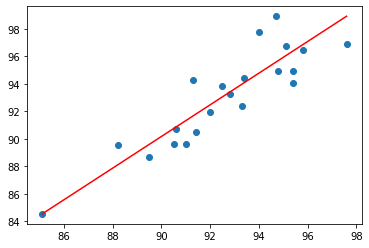

In [84]:
plt.scatter(y1_test,y1_prediction)
plt.plot([min(y1_test),max(y1_test)],[min(y1_prediction),max(y1_prediction)],color="red")

## First the correlation between the dependent variable and the independent variables are checked and the ones which have higher correlation are considered and others are droped. After predicting the dependent variables the R^2 value between the predicted values and the original values was found which appeared to be around 66%.  So, finally it can be concluded that the head length of a possum can be predicted to some extent if we know the considered independent variables.

### Reference: 1. Notebooks provided by Prof. Dr. Christina B. Claß.
